# An R package Rdrw to simulate and fit a multivariate damped random walk

This notebook illustrates how to use an R package "Rdrw" to simulate and fit a multivariate damped random walk process. 

This process is also called a multivariate CARMA(1, 0) process, multivariate Ornstein-Uhlenbeck process, a specific type of cokrigging or coregionalization in geostatistics, or a multi-task learning in machine learning.

This is an on-going work. More details and examples will be added in the future.

The proposed multivariate damped random walk process models each time series data set by three parameters of a univariate damped random work, $\mu_i$, $\sigma_i$, and $\tau_i$, where $\mu_i$ is the long-term average in magnitude, $\sigma_i$ is the short-term variability (standard deviation) in magnitude, and $\tau_i$ is the timescale in days. On top of the parameters of the univariate damped random walk, the proposed models cross-correlations among different time series data sets. For example, the proposed process models the two time series data sets can by 7 parameters, as illustrated below.

<img src="illu_mdrw3.png" width="600" />

Each time series data set has its own univariate damped random walk parameters, $\mu_i$, $\sigma_i$, and $\tau_i$, and the cross-correlation between these two time seres data sets is modeled by $\rho$.


Rigorously speaking, the proposed multivariate damped random walk process is motivated bythe following stochastic differential equation.

$$
d {\bf X}(t) = -D_{{\bf\tau}}^{-1}({\bf X}(t) - {\bf\mu})dt + D_{{\bf\sigma}} d {\bf B}(t),
$$

where ${\bf X}(t)=\{X_1(t), \ldots, X_k(t)\}$ is a vector of $k$ measurements/observations/magnitudes of the $k$ time series data sets in continuous time ${t\in R}$, ${D_{\bf\tau}}$ is a ${k\times k}$ diagonal matrix whose diagonal elements are ${k}$ timescales with each ${\tau_j}$ representing the  timescale of the ${j}$-th time series data, ${\bf\mu}=\{\mu_1, \ldots, \mu_k\}$ is a vector for long-term averages of the ${k}$ time series data sets, ${D_{{\bf\sigma}}}$ is ${k\times k}$ diagonal matrix whose diagonal elements are short-term variabilities (standard deviation) of ${k}$ time series data sets, and finally ${{\bf B}(t)=\{B_1(t), \ldots, B_k(t)\}}$ is a vector for ${k}$ standard Brownian motions whose ${k(k-1)/2}$ pairwise correlations are modeled by correlation parameters ${\rho_{jl}~(1\le j<l\le k)}$ such that ${dB_j(t)B_l(t) = \rho_{jl} dt}$.


We evaluate this continuous-time process at ${n}$ discrete observation times ${{\bf t} = \{t_1, \ldots, t_n\}}$.  The observed data ${{\bf x} = \{x_1, \ldots, x_n\}}$ are multiple time series data measured at irregularly spaced observation times ${{\bf t}}$ with possibly known measurement error standard deviations, ${\delta=\{\delta_1, \ldots, \delta_n\}}$. Since one or more time series observations can be measured at each observation time ${t_i}$, the length of a vector ${x_i}$ can be different, depending on how many time series observations are available at the ${i}$-th observation time. We assume that these observed data ${{\bf x}}$ are realizations of the latent time series data sets ${{\bf X(t)} = \{{\bf X}(t_1), \ldots, {\bf X}(t_n)\}}$ with Gaussian measurement errors whose variances are ${\delta}$. This is a typical setting of state-space modeling as described below. 
<img src="statespace5.png" width="600" />

Setting ${\delta}$ to zeros means that the observed data directly measure the latent values.


The likelihood function of model parameters can be obtained by marginalizing latent process ${\bf X}(t)$.

$$
L(\boldsymbol{\mu},  \boldsymbol{\sigma}, \boldsymbol{\tau}, \boldsymbol{\rho})=\int h_1(\boldsymbol{x}\mid \boldsymbol{X}(\boldsymbol{t}))\times f_1(\boldsymbol{X}(\boldsymbol{t}) \mid \boldsymbol{\mu},  \boldsymbol{\sigma}, \boldsymbol{\tau}, \boldsymbol{\rho}) ~d\boldsymbol{X}(\boldsymbol{t}). \nonumber
$$


We adopt a Kalman-filtering approach that evaluates this likelihood via a product of low dimensional Gaussian densities with minimum $O(n)$ \& maximum $O(k^3n)$ complexity. It is $O(n)$ if only one band is used at each observation time and is $O(k^3n)$ when all of the $k$ bands are used  at every observation time. 


$$
L(\boldsymbol{\mu},  \boldsymbol{\sigma}, \boldsymbol{\tau}, \boldsymbol{\rho}) = \prod_{i=1}^n p(\boldsymbol{x}_i\mid \mathcal{F}(t_{i-1}), \boldsymbol{\mu},  \boldsymbol{\sigma}, \boldsymbol{\tau}, \boldsymbol{\rho}),\label{lik.kalman},
$$

where $\mathcal{F}(t_{i-1})$ denote the natural filtration at time $t_{i-1}$, i.e., all of the information about the observed data available until time $t_{i-1}$.

Please note that when astronomical time series data are loaded on R by the function "read.table", "read.csv", etc., some decimal places of the the observation times are automatically rounded because R's default is to load seven effective digits. For example, R will load the observation time 51075.412789 as 51075.41. This default rule will produce many ties in observation times even though there is actually no tie in observation times. To prevent this, please type "options(digits = 11)" on the R console before loading the data if the observation times are in eleven effective digits.





## 0. Installing the package "Rdrw"

In [1]:
install.packages("Rdrw")
library(Rdrw)


The downloaded binary packages are in
	/var/folders/yk/fk6w4crd17v4g_qflhhv1xlc0000gn/T//RtmpOnGRu4/downloaded_packages


The function "install.packages("package name")" installs the specified R package. A pop-up menue will appear for users to select a close server. 

The function "library(package name)" will load the installed package on the current R session, which is required to use the installed package.

## 1. Simulation of a multivariate damped random walk

In [2]:
n <- 20 
n.datasets <- 3
obs.time <- cumsum(rgamma(n, shape = 3, rate = 1))
mu <- c(17, 18, 19)
sigma <- c(0.05, 0.08, 0.1)
tau <- c(50, 100, 150)
rho <- c(0.9, 0.7, 0.5)
measure.error.band <- c(0.01, 0.03, 0.05)
measure.error <- NULL
for(i in 1 : n.datasets) {
  measure.error <- cbind(measure.error, rnorm(n, measure.error.band[i], 0.002))
}

The number of observation times (across all bands) is set to 20. 

The number of bands (time series data sets) is 3. 
    
The observation cadences are randomly drawn from a Gamma distribution with mean 3 days. 

Three overall means are (17, 18, 19) in magnitude. 

Three true short-term variabilities (standard deviations) are (0.05, 0.08, 0.1) in magnitude. 

Three true timescales are (50, 100, 150) in days. 

Three cross-correlation parameters are (0.9, 0.7, 0.5), i.e., the cross-correlation between the 1st and 2nd bands is 0.9, that between the 1st and 3rd is 0.7, and that between the 2nd and 3rd is 0.5. 

Three average measurement error standard deviations are (0.01, 0.03, 0.05) so that  individual measurement error standard deviations are perturbed around these within each band. Each perturbation is made by generating a Gaussian random number centered at the average of each band with standard deviation 0.002.

In [3]:
x <- drw.sim(time = obs.time, n.datasets = 3, measure.error.SD = measure.error, 
             mu = mu, sigma = sigma, tau = tau, rho = rho)

The function "drw.sim(time, n.datasets, measure.error.SD, mu, sigma, tau, rho)" generates a simulated data set. 

The output is a 20 by 3 (n by n.datasets) matrix, each column contains n simulated magnitudes, and is saved to x.

In [4]:
library(repr)
options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 150)

If you run these codes directly in an R console, you do not need to run this option for a plot adjustment.

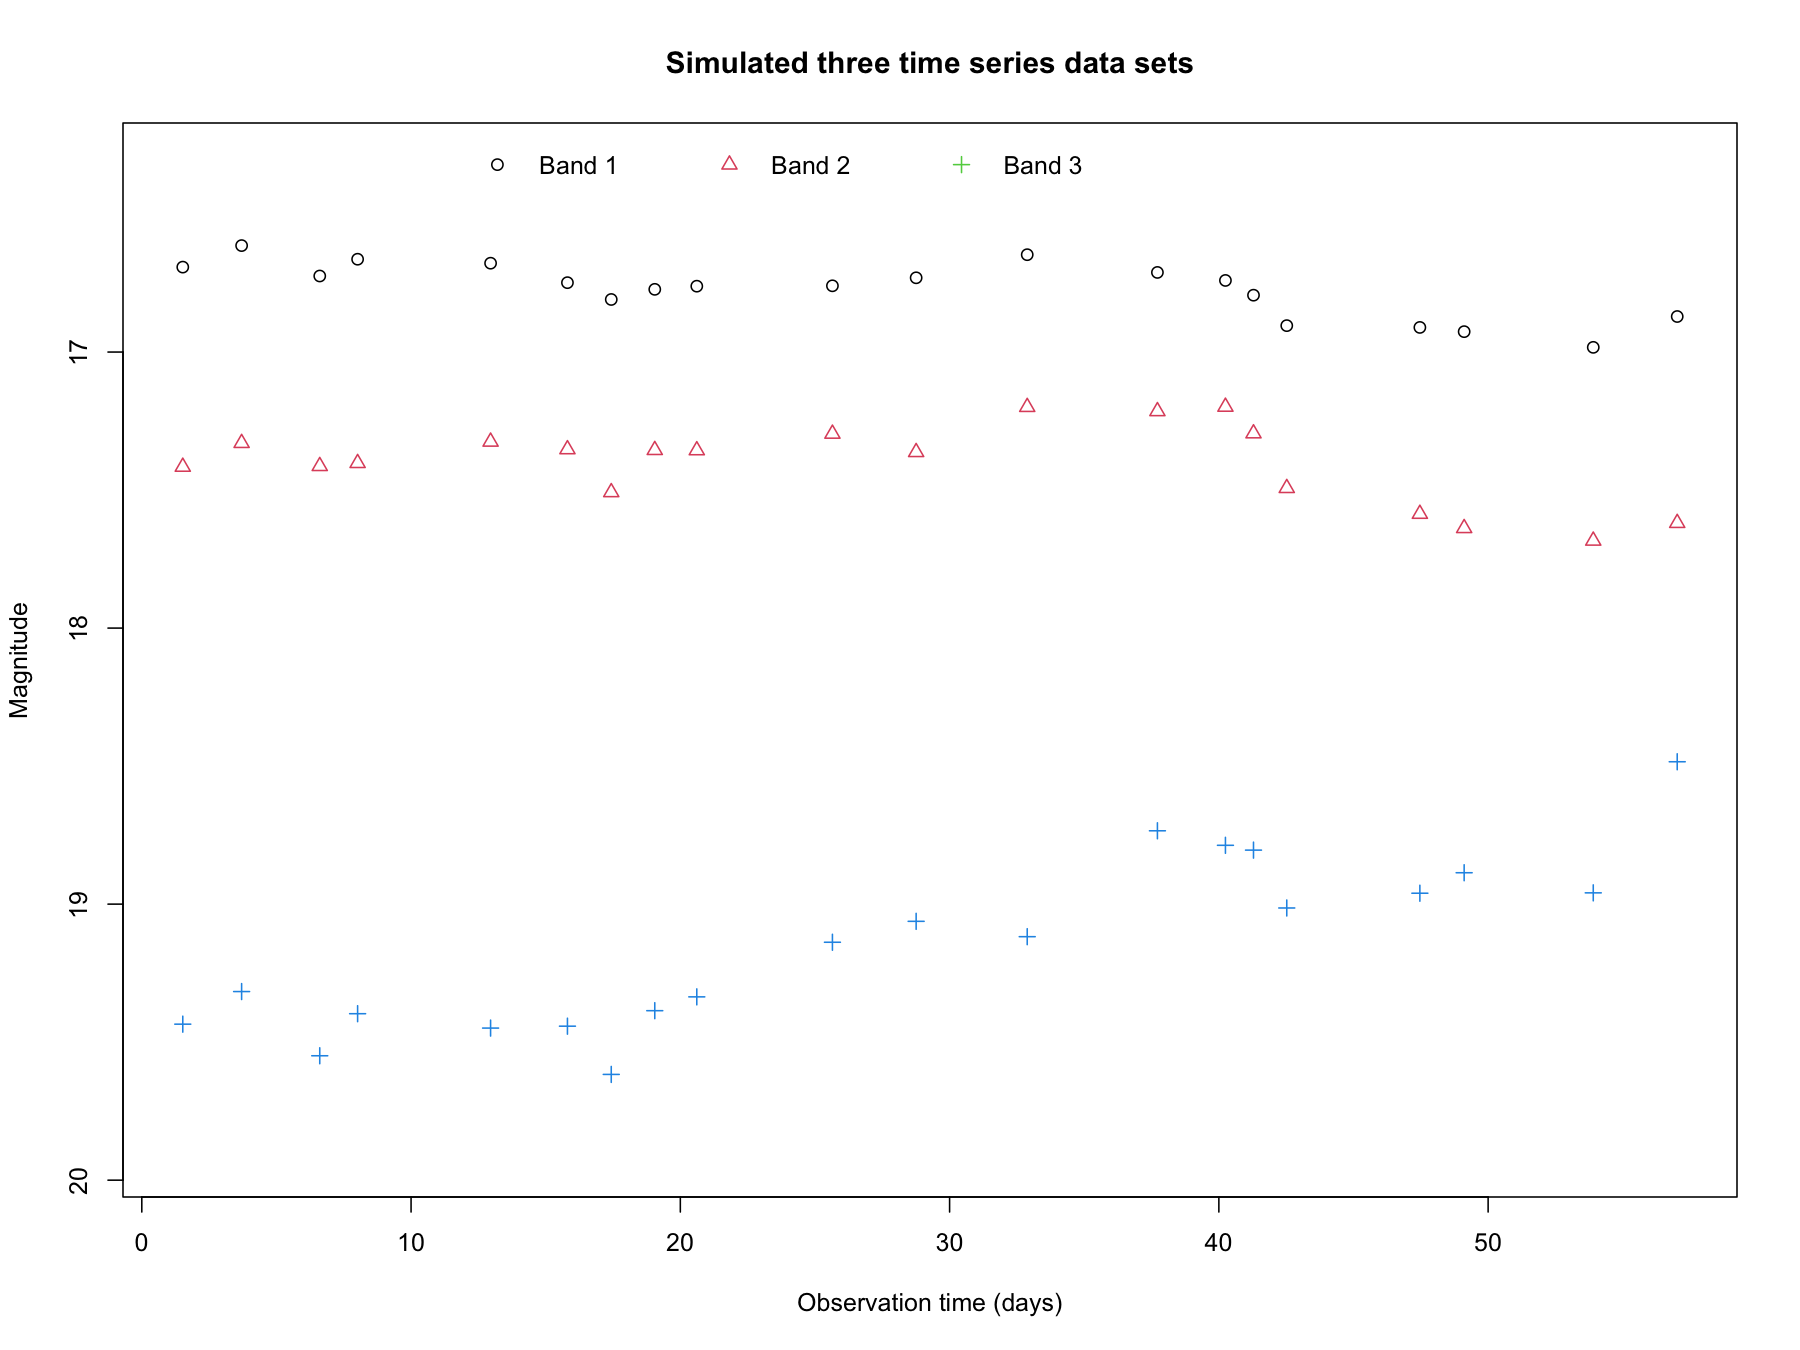

In [5]:
plot(obs.time, x[, 1], xlim = c(min(obs.time), max(obs.time)), ylim = c(max(x) + 0.3, min(x) - 0.3),
     xlab = "Observation time (days)", ylab = "Magnitude", main = "Simulated three time series data sets")
points(obs.time, x[, 2], col = 2, pch = 2)
points(obs.time, x[, 3], col = 4, pch = 3)
legend("top", c("Band 1", "Band 2", "Band 3"), col = c(1, 2, 3),
       pch = c(1 : 3), ncol = 4, bty = "n")

A plot is drawn to display the simulated three time series data sets.

The "plot(obs.time, x[, 1], xlim, ylim, xlab, ylab, main, pch)" function displays the first time series data set contained in the first column of the simulated data matrix x.

In the "plot" function, the first argument must be a vector containing the data for the x-axis.

The second argument must be a vector containing the data for the y-axis.

The argument "xlim" defines the minimum and maximum values of the x-axis.

The argument "ylim" defines the minimum and maximum values of the y-axis.

The argument "xlab" specifies the label of the x-axis.

The argument "ylab" specifies the label of the y-axis.

The argument "main" specifies the title of the plot.

The argument "main" specifies the title of the plot.

The function "points" adds the next time series data set contained in the second column of the simulated data matrix x.

In the "points" function, the argumetns "col" and "pch" define the color and shape of the plotted data points, respectively. "col = 2" means red, "col = 4" means blue, "pch = 2" means triangles, and "pch = 3" means crosses.



## 2. Fitting a multivariate damped random walk model on the simulation

In [6]:
data1 <- cbind(obs.time, x[, 1], measure.error[, 1])
data2 <- cbind(obs.time, x[, 2], measure.error[, 2])
data3 <- cbind(obs.time, x[, 3], measure.error[, 3])

To fit a model on the simulated data, we need to make three data matrices each for time series of one band.

Each 20 by 3 (n by 3) data matrix is composed of observation times, magnitudes, and known measurement error standard deviations.

The function "cbind(column1, column2, ...)" merges vectors column-wise.

In [7]:
fit.mle <- drw(data1 = data1, 
               data2 = data2, 
               data3 = data3, 
               n.datasets = 3, 
               method = "mle")

Starting at:  2020-10-25 23:50:11

Ending at:  2020-10-25 23:50:21



The function "drw" fits a multivariate damped random walk on the specified data sets.

The arguments "data1", "data2", and "data3" designate the three data matrices

The argument "n.datasets" specifies the number of data sets.

The argument "method" indicates which fitting method is used. "mle" returns maximum likelihood estimates for the model parameters.

In [8]:
fit.mle

$mu
[1] 16.80308 17.55309 19.06479

$sigma
[1] 0.03896395 0.05199629 0.09094515

$tau
[1]  8.143803 26.819245 48.258657

$rho
[1] 0.9473940 0.3547600 0.6052869

The maximum likelihood estimates of the model parameters.

In [9]:
fit.bayes <- drw(data1 = data1, 
                 data2 = data2, 
                 data3 = data3, 
                 n.datasets = 3, 
                 method = "bayes",
                 bayes.n.burn = 100, 
                 bayes.n.sample = 1000)

Starting at:  2020-10-25 23:50:21

Ending at:  2020-10-25 23:59:11



The argument "method" indicates which fitting method is used. "bayes" returns posterior samples for the model parameters.

The argument "bayesa.n.burn" specifies the number of burn-in iterations (to be discarded).

The argument "bayesa.n.sample" specifies the number of posterior samples (to be kept).

The default priors for the model parameters are Unif(-30, 30) for $\mu_i$'s, inverse-Gamma(1, $10^{-7}$) for $\sigma^2_i$'s, inverse-Gamma(1, 1) for $\tau_i$'s, and Unif(-1, 1) for $\rho_{jl}$'s.

The priors for $\mu_i$'s, $\sigma^2_i$'s, and $\tau_i$'s are motivated by both scientific knowledge and dynamics of damped random walk (Section 2.5, Tak et al., 2017).

The default initial values of the model parameters are maximum likelihood estimates.

In [10]:
names(fit.bayes)

[1] "mu"                "sigma"             "tau"              
[4] "rho"               "mu.accept.rate"    "sigma.accept.rate"
[7] "tau.accept.rate"   "rho.accept.rate"   "data.comb"

The function "names" lists contents of the fitting result.

"mu" is an 1000 by 3) matrix. The $i$-th column contains 1000 posterior samples of $\mu_i$.

"sigma" is a 1000 by 3 (bayes.n.sample by n.datasets) matrix. The $i$-th column contains 1000 posterior samples of $\sigma_i$.

"tau" is a 1000 by 3 (bayes.n.sample by n.datasets) matrix. The $i$-th column contains 1000 posterior samples of $\tau_i$.

"rho" is a 1000 by 3 (bayes.n.sample by n.datasets) matrix. The 1st column contains 1000 posterior samples of $\rho_{12}$, the 2nd contains those of $\rho_{13}$, and the 3rd contains those of $\rho_{23}$.

"*.accept.rate" contains 3 (n.datasets) average acceptance rates for parameter * in each band due to the use of Metropolis-Hastings transition.

"data.comb" returns a combined data set of data1, data2, and data3.

In [11]:
summary(fit.bayes$mu[, 1])
summary(fit.bayes$mu[, 2])
summary(fit.bayes$mu[, 3])

summary(log(fit.bayes$sigma[, 1], base = 10))
summary(log(fit.bayes$sigma[, 2], base = 10))
summary(log(fit.bayes$sigma[, 3], base = 10))

summary(log(fit.bayes$tau[, 1], base = 10))
summary(log(fit.bayes$tau[, 2], base = 10))
summary(log(fit.bayes$tau[, 3], base = 10))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.52   16.76   16.79   16.79   16.81   16.93 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.64   17.37   17.47   17.46   17.56   17.94 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.23   18.29   18.65   18.63   19.08   20.43 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.562  -1.454  -1.409  -1.410  -1.373  -1.236 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.466  -1.333  -1.284  -1.281  -1.233  -1.101 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.2029 -1.0920 -1.0318 -1.0303 -0.9792 -0.8249 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5924  0.9578  1.0631  1.0910  1.1900  2.0435 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7086  1.3237  1.5025  1.5584  1.7599  3.0344 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9236  1.6139  1.9913  2.0382  2.3998  3.8113 

The function "summary" returns a five-number summary: minimum, 1st quantile, mean, 2nd quantile (median), 3rd quantile, maximum.

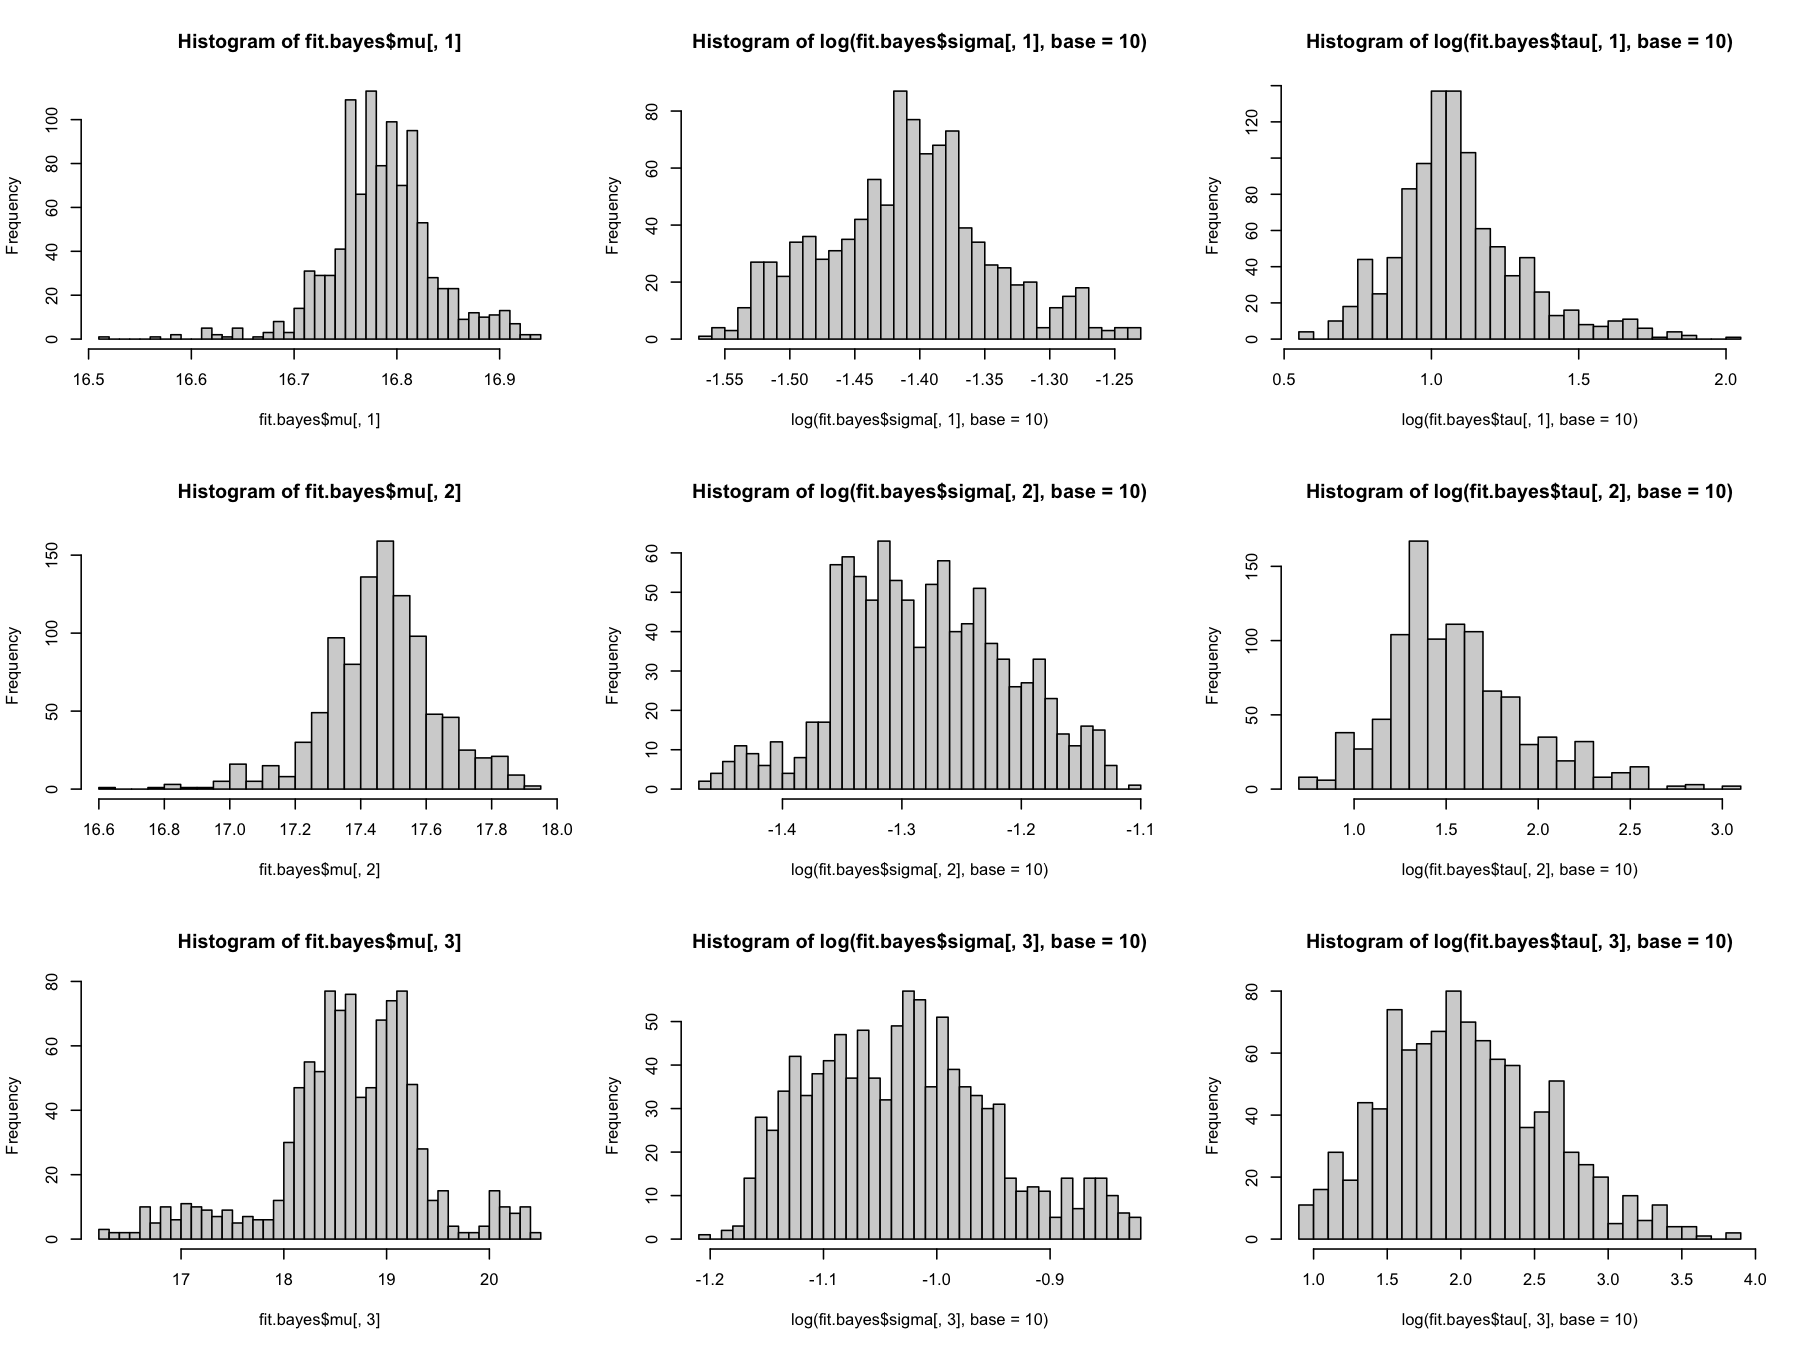

In [12]:
par(mfcol = c(3, 3))

hist(fit.bayes$mu[, 1], 30)
hist(fit.bayes$mu[, 2], 30)
hist(fit.bayes$mu[, 3], 30)

hist(log(fit.bayes$sigma[, 1], base = 10), 30)
hist(log(fit.bayes$sigma[, 2], base = 10), 30)
hist(log(fit.bayes$sigma[, 3], base = 10), 30)

hist(log(fit.bayes$tau[, 1], base = 10), 30)
hist(log(fit.bayes$tau[, 2], base = 10), 30)
hist(log(fit.bayes$tau[, 3], base = 10), 30)

The function "par" divides a plot into 3 by 3 subplots. 

The argument "mfcol" fills out subplots column-wise, and "mfrow" does row-wise.

The function "hist" displays a histogram of the specified vector. 

The second argument specifies the number of bars.